<a href="https://colab.research.google.com/github/futurebly/Web-AI/blob/main/Day6~7_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D%EA%B3%BC_%EC%8B%9C%EA%B0%81%ED%99%94_%EC%9E%85%EB%AC%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
########################################## Day 6 ##########################################

# 데이터 시각화

In [ ]:
import seaborn as sns
df = sns.load_dataset('tips')
print(df.shape)
print(df.info())
df.head()

(244, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB
None


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [ ]:
df['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [ ]:
df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [ ]:
df['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [ ]:
df['size'].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

## 데이터 요약: 범주형 변수
* 절대 빈도
* 상대 빈도

In [ ]:
import pandas as pd
pd.DataFrame({'절대빈도': df['day'].value_counts(),
              '상대빈도': df['day'].value_counts(normalize=True)})

,절대빈도,상대빈도
Sat,87,0.356557
Sun,76,0.311475
Thur,62,0.254098
Fri,19,0.077869


In [ ]:
pd.DataFrame({'절대빈도': df['smoker'].value_counts(),
              '상대빈도': df['smoker'].value_counts(normalize=True)})

,절대빈도,상대빈도
No,151,0.618852
Yes,93,0.381148


In [ ]:
pd.DataFrame({'절대빈도': df['day'].value_counts(),
              '상대빈도': df['day'].value_counts(normalize=True)})

,절대빈도,상대빈도
Sat,87,0.356557
Sun,76,0.311475
Thur,62,0.254098
Fri,19,0.077869


In [ ]:
pd.DataFrame({'절대빈도': df['time'].value_counts(),
              '상대빈도': df['time'].value_counts(normalize=True)})

,절대빈도,상대빈도
Dinner,176,0.721311
Lunch,68,0.278689


In [ ]:
pd.DataFrame({'절대빈도': df['size'].value_counts(),
              '상대빈도': df['size'].value_counts(normalize=True)})

,절대빈도,상대빈도
2,156,0.639344
3,38,0.155738
4,37,0.151639
5,5,0.020492
6,4,0.016393
1,4,0.016393


### 범주형 변수의 시각화
- bar 그래프
- pie 그래프

In [ ]:
df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

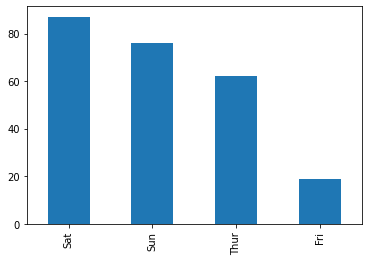

In [ ]:
df['day'].value_counts().plot.bar()

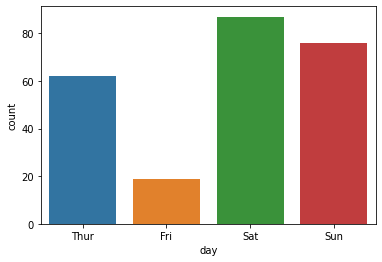

In [ ]:
sns.countplot(x='day', data=df)

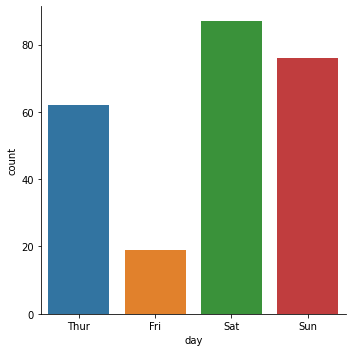

In [ ]:
sns.catplot(x="day", data=df, kind='count')

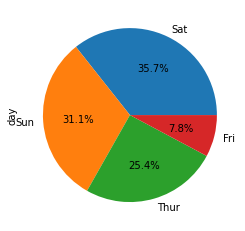

In [ ]:
df['day'].value_counts().plot.pie(autopct='%.1f%%')

## 부록. json에 대하여
- json은 원래 javascript에서 프로그램끼리 데이터를 주고 받기 위해 만들어 진 포맷
- 워낙 좋아서 모든 언어들에서 표준처럼 사용하기 시작함.
- dict + list 구조를 표현할 수 있다.

In [ ]:
students = [
    {'name': 'blackdew', 'math': 50, 'eng': 60},
    {'name': 'egoing', 'math': 60, 'eng': 50}        
]

In [ ]:
import json
json.dumps(students)

'[{"name": "blackdew", "math": 50, "eng": 60}, {"name": "egoing", "math": 60, "eng": 50}]'

In [ ]:
with open('sample.json', 'w') as f:
    f.write(json.dumps(students))

In [ ]:
with open('sample.json', 'r') as f:
    s = f.read()
print(s)

[{"name": "blackdew", "math": 50, "eng": 60}, {"name": "egoing", "math": 60, "eng": 50}]


In [ ]:
ss = json.loads(s)
print(f"이름: {ss[0]['name']}, 영어: {ss[0]['eng']}")

이름: blackdew, 영어: 60


## 데이터 요약: 수치형 변수
- 평균, 표준편차, 중앙값, 사분위수 (describe)
- 시각화 방법
 - histogram(구간별로 나눠서), kde(density)
 - boxplot(중앙값, 사분위수 표현)

In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


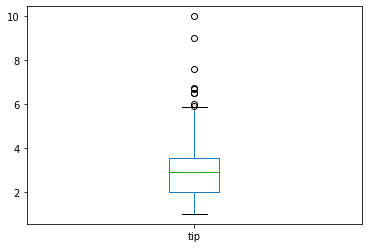

In [ ]:
df['tip'].plot.box()

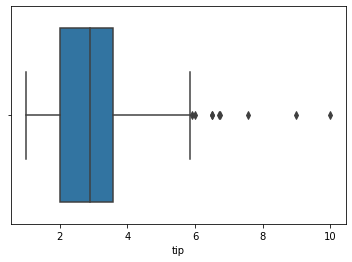

In [ ]:
sns.boxplot(x='tip', data=df)

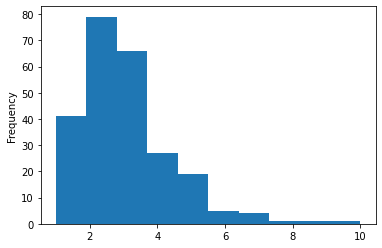

In [ ]:
df['tip'].plot.hist()

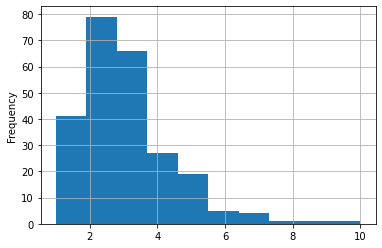

In [ ]:
df['tip'].plot.hist(grid=1)

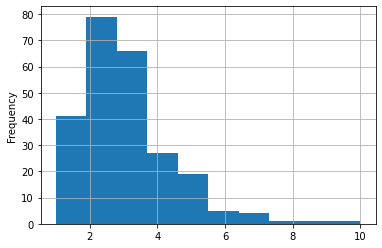

In [ ]:
df['tip'].plot.hist(grid=1, bins=10)

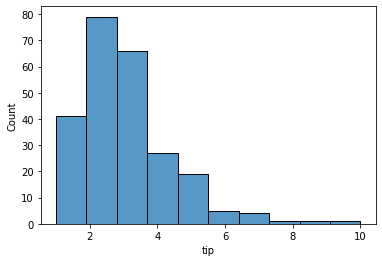

In [ ]:
sns.histplot(x='tip', data=df, bins=10)

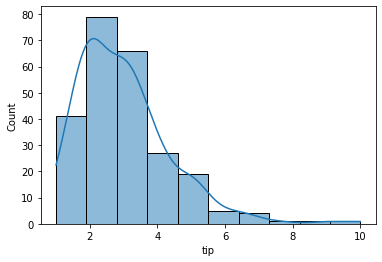

In [ ]:
sns.histplot(x='tip', data=df, bins=10, kde=True)

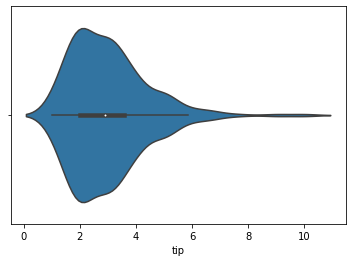

In [ ]:
sns.violinplot(x='tip', data=df)

## 변수의 상관관계: 수치형 - 수치형
- scatter
- 상관계수

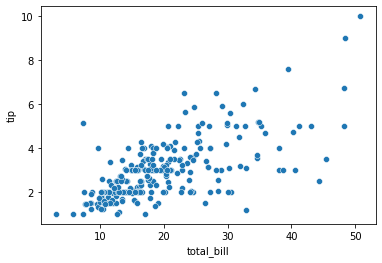

In [ ]:
sns.scatterplot(x='total_bill', y='tip', data=df)

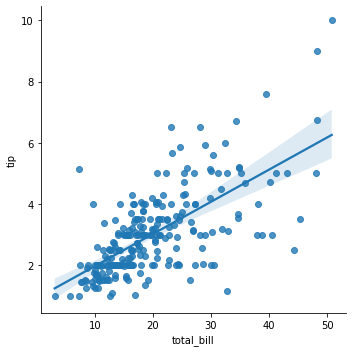

In [ ]:
sns.lmplot(data=df, x='total_bill', y='tip') #신뢰도95%인 신뢰구간

In [ ]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


## 변수의 상관관계: 범주형 - 범주형

- cross table / contingency table
- grouped bar graph

 sex, smoker, day, time, size

In [ ]:
#절대빈도
pd.crosstab(df['sex'], df['smoker'], margins=True)

smoker,Yes,No,All
sex,,,
Male,60,97,157
Female,33,54,87
All,93,151,244


In [ ]:
#행방향 상대빈도
pd.crosstab(df['sex'], df['smoker'], margins=True, normalize='index')

smoker,Yes,No
sex,,
Male,0.382166,0.617834
Female,0.379310,0.620690
All,0.381148,0.618852


In [ ]:
pd.crosstab(df['sex'], df['smoker'], margins=True, normalize='all')

smoker,Yes,No,All
sex,,,
Male,0.245902,0.397541,0.643443
Female,0.135246,0.221311,0.356557
All,0.381148,0.618852,1.000000


In [ ]:
pd.crosstab(df['sex'], df['smoker'], margins=True, normalize='columns')

smoker,Yes,No,All
sex,,,
Male,0.645161,0.642384,0.643443
Female,0.354839,0.357616,0.356557


In [ ]:
#상대빈도(all)/ 전체가 1.
pd.crosstab(df['sex'], df['smoker'], margins=True, normalize='all')

smoker,Yes,No,All
sex,,,
Male,0.245902,0.397541,0.643443
Female,0.135246,0.221311,0.356557
All,0.381148,0.618852,1.000000


In [ ]:
#열방향 상대빈도/흡연이 1, 비흡연이 1/ 성별과 흡연은 별 관련이 없다=all과 yes와 no가 다 비슷한 비율.
pd.crosstab(df['sex'], df['smoker'], margins=True, normalize='columns')

smoker,Yes,No,All
sex,,,
Male,0.645161,0.642384,0.643443
Female,0.354839,0.357616,0.356557


In [ ]:
#평일과 주말 등 요일에 따라 성별의 비율이 달라지므로, 성별과 요일은 서로 관련이 있다.
pd.crosstab(df['sex'], df['day'], margins=True, normalize='columns')

day,Thur,Fri,Sat,Sun,All
sex,,,,,
Male,0.483871,0.526316,0.678161,0.763158,0.643443
Female,0.516129,0.473684,0.321839,0.236842,0.356557


In [ ]:
pd.crosstab(df['sex'], df['day'], margins=True, normalize='index')

day,Thur,Fri,Sat,Sun
sex,,,,
Male,0.191083,0.063694,0.375796,0.369427
Female,0.367816,0.103448,0.321839,0.206897
All,0.254098,0.077869,0.356557,0.311475


In [ ]:
pd.crosstab(df['sex'], df['day'], margins=True, normalize='columns')

day,Thur,Fri,Sat,Sun,All
sex,,,,,
Male,0.483871,0.526316,0.678161,0.763158,0.643443
Female,0.516129,0.473684,0.321839,0.236842,0.356557


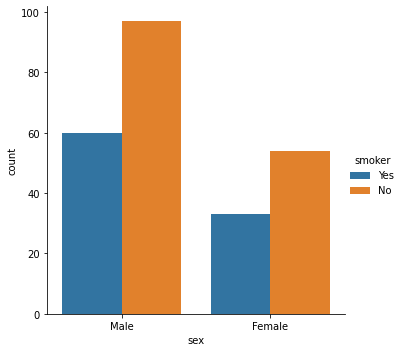

In [ ]:
# sns.countplot(x='sex', hue='smoker', data=df)
sns.catplot(x='sex', hue='smoker', data=df, kind="count")

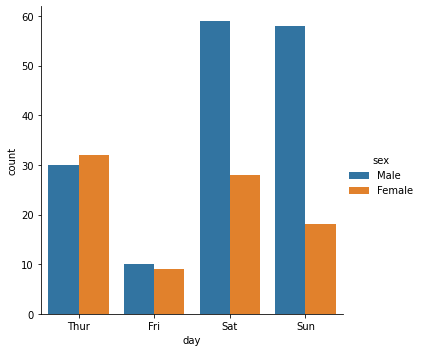

In [ ]:
sns.catplot(x='day', hue='sex', data=df, kind="count")

### KRX 증권 데이터 시각화

In [ ]:
!pip install finance-datareader

In [ ]:
import FinanceDataReader as fdr

# 삼성전자(005930) 전체 (1996-11-05 ~ 현재)
df = fdr.DataReader('005930')
print(df.shape)
df.info()

(6000, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6000 entries, 1997-10-16 to 2021-11-12
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6000 non-null   int64  
 1   High    6000 non-null   int64  
 2   Low     6000 non-null   int64  
 3   Close   6000 non-null   int64  
 4   Volume  6000 non-null   int64  
 5   Change  5999 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 328.1 KB


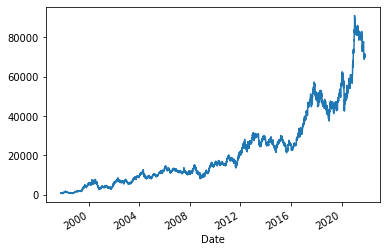

In [ ]:
df['Close'].plot.line()

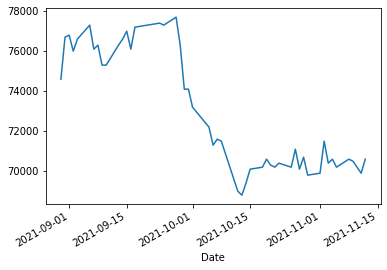

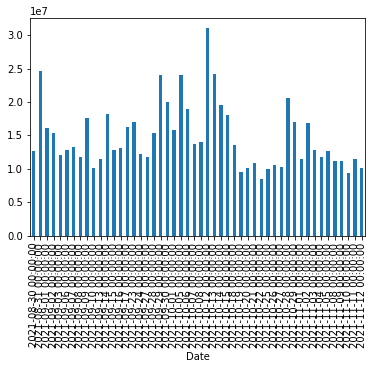

In [ ]:
import matplotlib.pyplot as plt
df['Close'][-50:].plot.line()
plt.show()
df['Volume'][-50:].plot.bar()
plt.show()

In [ ]:
import FinanceDataReader as fdr

# Apple(AAPL), 2017-01-01 ~ Now
df = fdr.DataReader('AAPL', '2017')
df.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2021-11-08,150.44,151.41,151.57,150.16,54770000.0,-0.0056
2021-11-09,150.81,150.20,151.43,150.06,56570000.0,0.0025
2021-11-10,147.92,150.02,150.13,147.85,64350000.0,-0.0192
2021-11-11,147.87,148.96,149.43,147.68,40720000.0,-0.0003
2021-11-12,149.99,148.43,150.40,147.48,63800000.0,0.0143


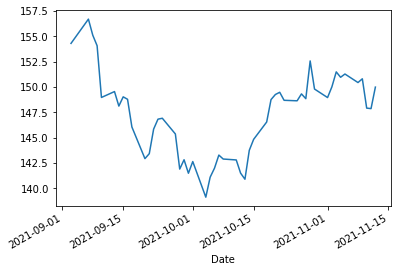

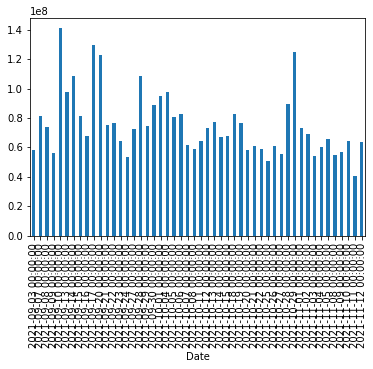

In [ ]:
import matplotlib.pyplot as plt
df['Close'][-50:].plot.line()
plt.show()
df['Volume'][-50:].plot.bar()
plt.show()

In [ ]:
########################################## Day 7 ##########################################

## 변수의 상관관계: 범주형 - 수치형
- 범주별 통계량
- grouped boxplot/violinplot

In [ ]:
import seaborn as sns
df = sns.load_dataset('tips')

In [ ]:
df.groupby(['day'])[['tip']].describe()

tip                                                        
     count      mean       std   min     25%    50%     75%    max
day                                                               
Thur  62.0  2.771452  1.240223  1.25  2.0000  2.305  3.3625   6.70
Fri   19.0  2.734737  1.019577  1.00  1.9600  3.000  3.3650   4.73
Sat   87.0  2.993103  1.631014  1.00  2.0000  2.750  3.3700  10.00
Sun   76.0  3.255132  1.234880  1.01  2.0375  3.150  4.0000   6.50

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [ ]:
df.groupby(['sex'])[['tip']].describe()

tip                                                
        count      mean       std  min  25%   50%   75%   max
sex                                                          
Male    157.0  3.089618  1.489102  1.0  2.0  3.00  3.76  10.0
Female   87.0  2.833448  1.159495  1.0  2.0  2.75  3.50   6.5

In [ ]:
df.groupby(['time'])[['tip']].describe()

tip                                                   
        count      mean       std   min  25%   50%     75%   max
time                                                            
Lunch    68.0  2.728088  1.205345  1.25  2.0  2.25  3.2875   6.7
Dinner  176.0  3.102670  1.436243  1.00  2.0  3.00  3.6875  10.0

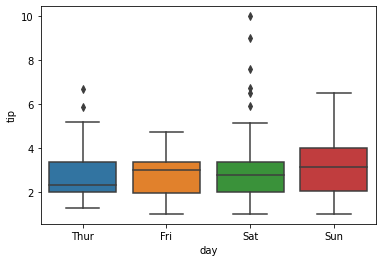

In [ ]:
sns.boxplot(x='day', y='tip', data=df)

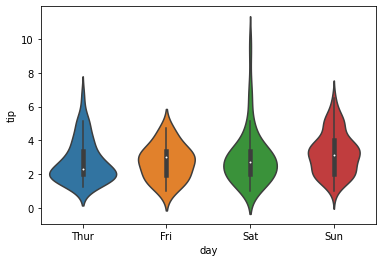

In [ ]:
sns.violinplot(x='day', y='tip', data=df)

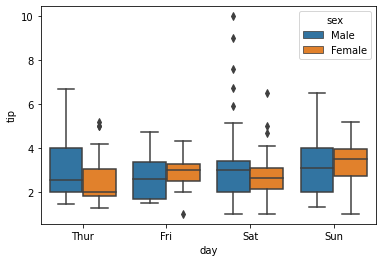

In [ ]:
sns.boxplot(x='day', y='tip', hue='sex', data=df)

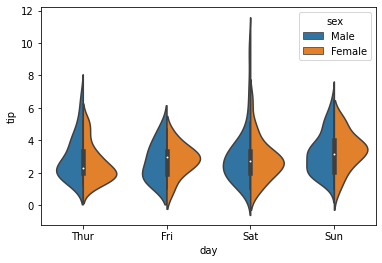

In [ ]:
sns.violinplot(x='day', y='tip', hue='sex', data=df, split=True)

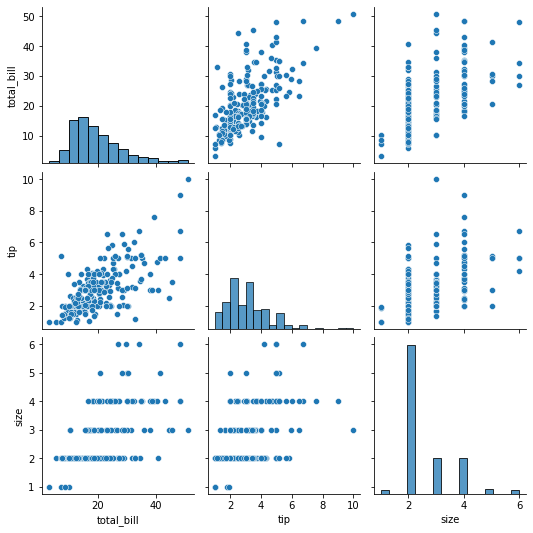

In [ ]:
sns.pairplot(df)

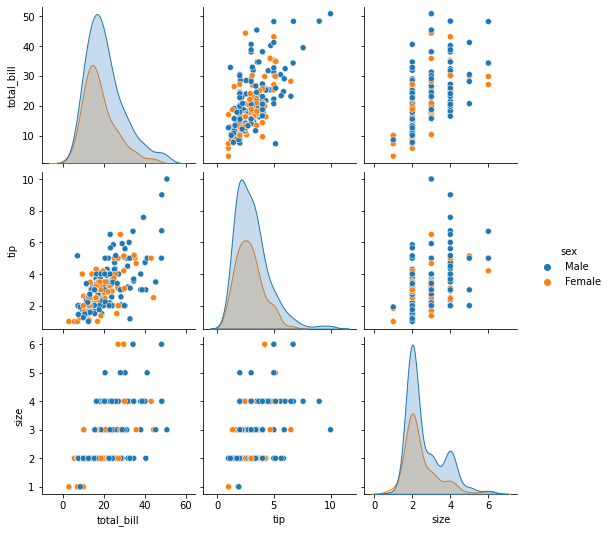

In [ ]:
sns.pairplot(df, hue='sex')

## Seaborn 시각화 도구 사용법

### countplot

In [ ]:
tips = sns.load_dataset("tips")
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


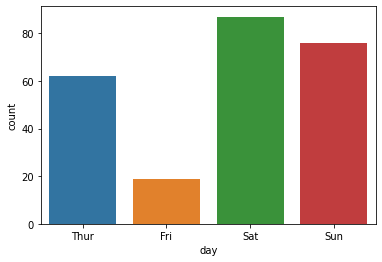

In [ ]:
sns.countplot(x="day", data=tips)

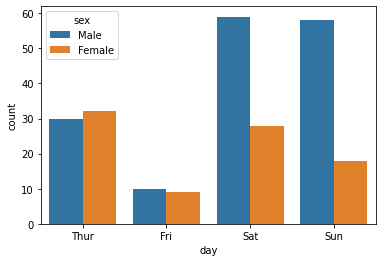

In [ ]:
sns.countplot(x='day', hue='sex', data=tips)

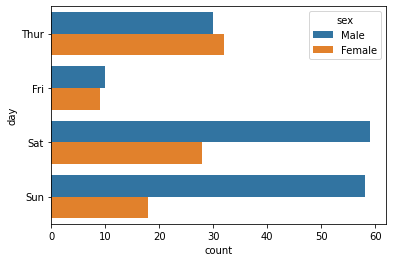

In [ ]:
sns.countplot(y="day", hue="sex", data=tips)

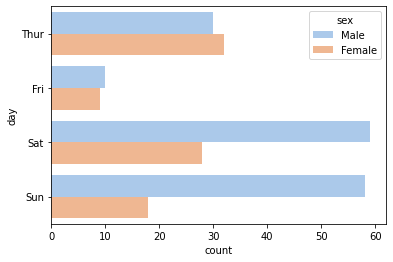

In [ ]:
sns.countplot(y='day', hue='sex', data=tips, palette=sns.color_palette("pastel"))

### barplot

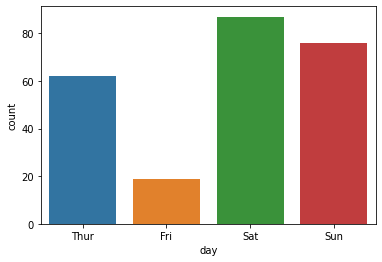

In [ ]:
sns.countplot(x='day', data=tips)

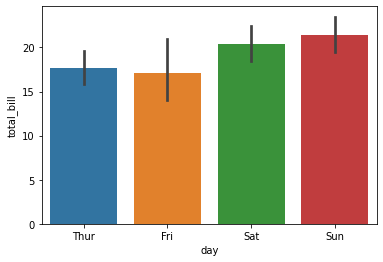

In [ ]:
sns.barplot(x='day', y='total_bill', data=tips)

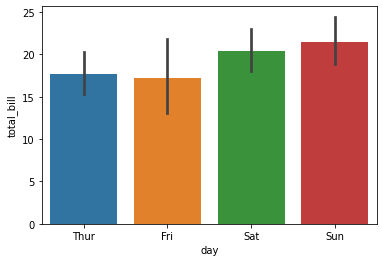

In [ ]:
sns.barplot(x='day', y='total_bill', data=tips, ci=99)

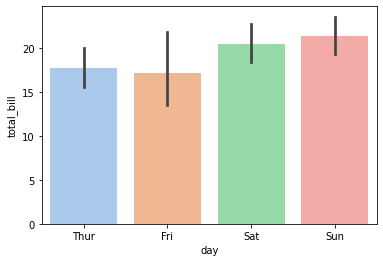

In [ ]:
sns.barplot(data=tips, x="day", y="total_bill", ci=97, palette=sns.color_palette("pastel"))

### histogram, kde - displot(kind: hist, kde)

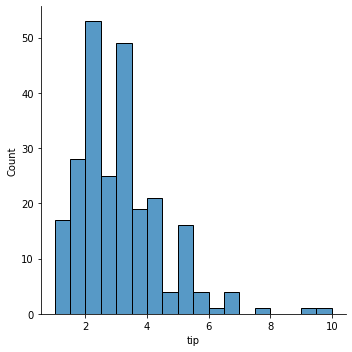

In [ ]:
sns.displot(data=tips, x="tip", kind='hist')

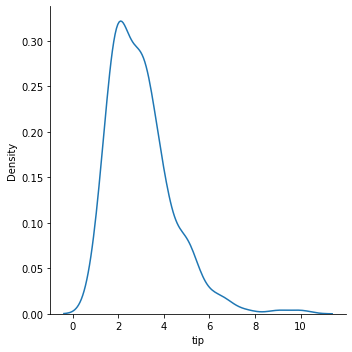

In [ ]:
sns.displot(data=tips, x="tip", kind='kde')

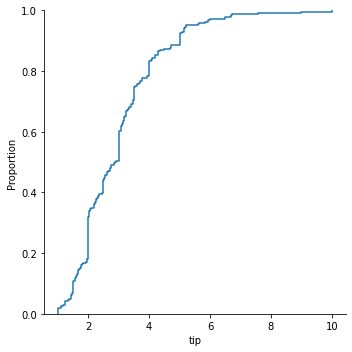

In [ ]:
# 누적
sns.displot(data=tips, x="tip", kind='ecdf')

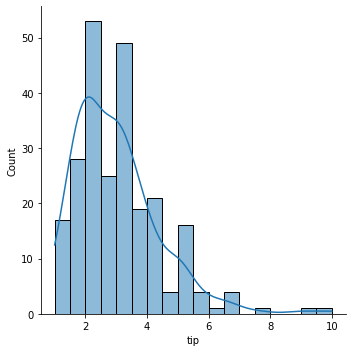

In [ ]:
sns.displot(data=tips, x="tip", kde=True, kind='hist')

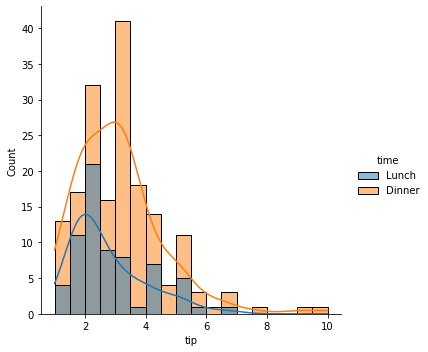

In [ ]:
sns.displot(data=tips, x="tip", kde=True, hue='time', kind='hist')

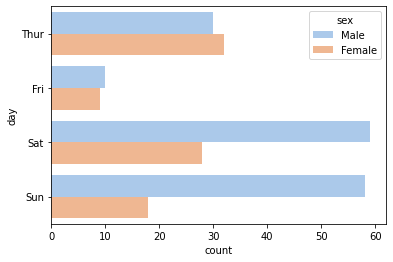

In [ ]:
sns.countplot(y="day", hue="sex", data=tips, palette=sns.color_palette("pastel"))

### catplot - 카테고리별 plot을 찍어본다(kidn: strip, swarm)

strip이 default

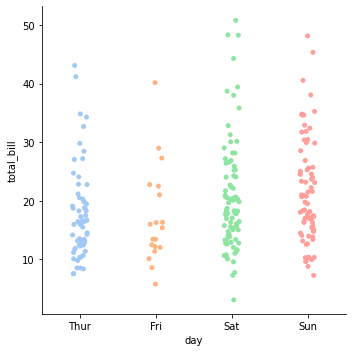

In [ ]:
sns.catplot(x="day", y="total_bill", data=tips, palette=sns.color_palette("pastel"))

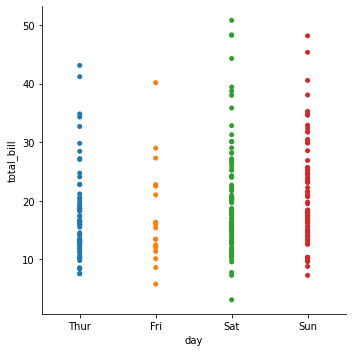

In [ ]:
#jitter False는 일렬로 세운것
sns.catplot(x="day", y="total_bill", jitter=False, data=tips)

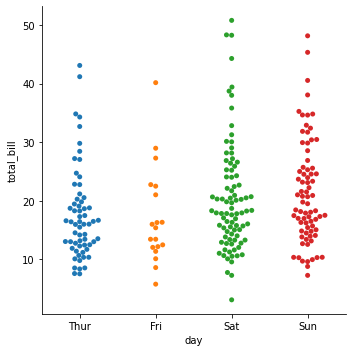

In [ ]:
#흩어짐의 정도를 좀 더 잘 볼수있음
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

### pairplot 혼자 해보기

## anscombe
- 옆에 sample data에 anscombe.json 있음

In [ ]:
import pandas as pd
df = pd.read_json('/content/sample_data/anscombe.json')
df.columns = ['season', 'ad', 'sales']
df.head()

,season,ad,sales
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33


In [ ]:
df['season'].value_counts()

I      11
IV     11
III    11
II     11
Name: season, dtype: int64

In [ ]:
df.groupby(['season']).describe()

ad                           ... sales                          
       count mean       std  min  25%  ...   min    25%   50%   75%    max
season                                 ...                                
I       11.0  9.0  3.316625  4.0  6.5  ...  4.26  6.315  7.58  8.57  10.84
II      11.0  9.0  3.316625  4.0  6.5  ...  3.10  6.695  8.14  8.95   9.26
III     11.0  9.0  3.316625  4.0  6.5  ...  5.39  6.250  7.11  7.98  12.74
IV      11.0  9.0  3.316625  8.0  8.0  ...  5.25  6.170  7.04  8.19  12.50

[4 rows x 16 columns]

In [ ]:
df.describe()

,ad,sales
count,44.000000,44.000000
mean,9.000000,7.500455
std,3.198837,1.959244
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [ ]:
df.corr()

,ad,sales
ad,1.000000,0.816308
sales,0.816308,1.000000


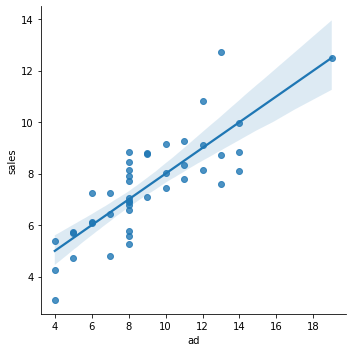

In [ ]:
sns.lmplot(x='ad', y='sales', data=df)

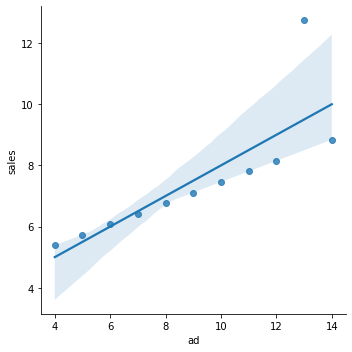

In [ ]:
## season별로 나눠서 찍어보기
sns.lmplot(x='ad', y='sales', data=df[(df['season'] == 'III')])

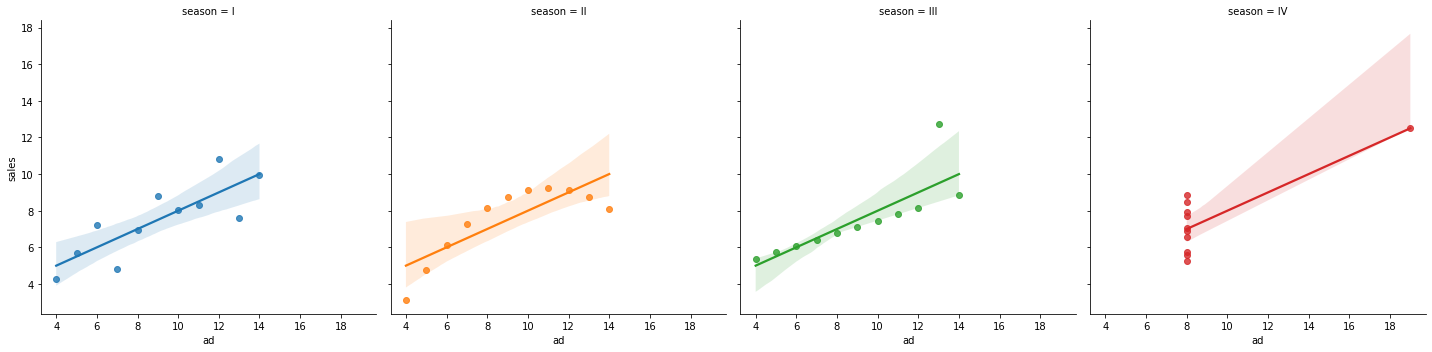

In [ ]:
sns.lmplot(x='ad', y='sales', data=df, col='season', hue='season')